# Step: 1

In [112]:
import numpy as np
import cv2 # OpenCV-Python
%matplotlib inline
import matplotlib.pyplot as plt
import imutils
import time

In [113]:
img = cv2.imread('Capture.PNG',1) 

if img is None:
    print ('Open Error')
else:
    print ('Image Loaded')
img = imutils.resize(img, width=500) #justto beable to see clearly
cv2.imshow('NORMAL IMAGE',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

Image Loaded


In [114]:
hsv_img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
cv2.imshow('HSV IMAGE',hsv_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [115]:
img.shape

(547, 500, 3)

In [116]:
img.shape[0:2]

(547, 500)

In [117]:
img[:,:,2]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [118]:
blank_canvas = np.zeros((1347, 1230,3),np.uint8)

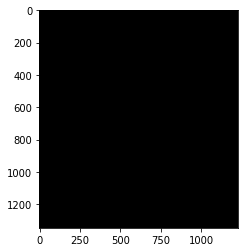

In [119]:
plt.imshow(blank_canvas)

In [120]:
lower_range = np.array([34, 177, 76])
upper_range = np.array([255, 255, 255])

In [121]:
blank_canvas = cv2.inRange(hsv_img, lower_range, upper_range)

In [122]:
cv2.imshow('Blank canvas', blank_canvas)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [123]:
blank_canvas.shape

(547, 500)

In [124]:
edged = cv2.Canny(blank_canvas, 30, 200) 
cv2.waitKey(0) 

-1

In [125]:
contours, hierarchy = cv2.findContours(edged,  
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 

In [134]:
contours

[array([[[391, 358]],
 
        [[390, 359]],
 
        [[389, 359]],
 
        [[388, 359]],
 
        [[387, 359]],
 
        [[386, 359]],
 
        [[385, 359]],
 
        [[384, 360]],
 
        [[383, 360]],
 
        [[382, 360]],
 
        [[381, 360]],
 
        [[380, 361]],
 
        [[379, 361]],
 
        [[378, 361]],
 
        [[377, 362]],
 
        [[376, 362]],
 
        [[375, 363]],
 
        [[374, 363]],
 
        [[373, 364]],
 
        [[372, 364]],
 
        [[371, 365]],
 
        [[370, 365]],
 
        [[369, 366]],
 
        [[368, 366]],
 
        [[367, 367]],
 
        [[366, 367]],
 
        [[365, 368]],
 
        [[364, 369]],
 
        [[363, 369]],
 
        [[362, 370]],
 
        [[361, 371]],
 
        [[360, 372]],
 
        [[359, 373]],
 
        [[358, 373]],
 
        [[357, 374]],
 
        [[356, 375]],
 
        [[356, 376]],
 
        [[355, 377]],
 
        [[354, 378]],
 
        [[353, 379]],
 
        [[352, 380]],
 
        [[352, 3

In [126]:
cv2.imshow('Canny Edges After Contouring', edged)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [127]:
print("Number of Contours found = " + str(len(contours))) 

Number of Contours found = 147


In [128]:
cv2.drawContours(blank_canvas, contours, -1, (0, 255, 0), 3) 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [129]:
cv2.imshow('Contours', blank_canvas) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 

In [130]:
combined = np.hstack((img[:,:,1],hsv_img[:,:,1],blank_canvas))

In [131]:
cv2.imshow('combined', combined) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 

# Step: 2

In [132]:
all_contour_points = contours[0]

In [133]:
(x,y),radius = cv2.minEnclosingCircle(all_contour_points)
center = (int(x),int(y))
r = int(radius)
cv2.circle(img,center,r,(0,255,0),3)
cv2.circle(img,center,3,(255,255,0),3)
cv2.drawContours(img, [all_contour_points], 0, (0,0,255), 3)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Step: 3

# Tracking the video

In [105]:
#https://www.pyimagesearch.com/2016/02/01/opencv-center-of-contour/
import numpy as np
import cv2 # OpenCV-Python
%matplotlib inline
import matplotlib.pyplot as plt
import imutils
import time

def nothing(x):
    pass

cam= cv2.VideoCapture(0)
fps = cam.get(cv2.CAP_PROP_FPS)
timestamps = [cam.get(cv2.CAP_PROP_POS_MSEC)]
calc_timestamps = [0.0]
# cv2.namedWindow("Trackbars")
# cv2.createTrackbar("L-H","Trackbars",0,255,nothing)
# cv2.createTrackbar("L-S","Trackbars",0,255,nothing)
# cv2.createTrackbar("L-V","Trackbars",0,255,nothing)
# cv2.createTrackbar("U-H","Trackbars",0,255,nothing)
# cv2.createTrackbar("U-S","Trackbars",0,255,nothing)
# cv2.createTrackbar("U-V","Trackbars",0,255,nothing)
#videowrite
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (640,480))
timeElapsedlist = []
while True:
    ret, image=cam.read()
    startTime = time.time()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]
    frame = cv2.flip(thresh,1)
        # write the flipped frame
#     l_h = cv2.getTrackbarPos("L-H","Trackbars")
#     l_s = cv2.getTrackbarPos("L-S","Trackbars")
#     l_v = cv2.getTrackbarPos("L-V","Trackbars")
#     u_h = cv2.getTrackbarPos("U-H","Trackbars")
#     u_s = cv2.getTrackbarPos("U-S","Trackbars")
#     u_v = cv2.getTrackbarPos("U-V","Trackbars")
    hsv_img = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
#     # create the Mask
#     lower_range = np.array([l_h,l_s,l_v])
#     upper_range = np.array([u_h,u_s,u_v])
    lower_range = np.array([36,0,0,])
    upper_range = np.array([86,255,255])
    mask = cv2.inRange(hsv_img, lower_range, upper_range)
    cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    for c in cnts:
        M = cv2.moments(c)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
        else:
            cX, cY = 0, 0
        (x,y),radius = cv2.minEnclosingCircle(all_contour_points)
        center = (int(x),int(y))
        radius = int(radius)
        cv2.circle(image, (cX, cY), 15, (0,0,255), 8)     
    cv2.imshow("cam",image)
    out.write(image)
    timeElapsed = time.time() - startTime 
    timeElapsedlist.append(timeElapsed)
    # open .txt file to save data
    f = open('hw3data.txt','a')
    # print time to run through loop to the screen & save to file
    f.write(str(timeElapsed))
    f.write('\n')
    print('time elapsed in this frame is > > > > ', timeElapsed)
    k = cv2.waitKey(100) & 0xFF
    if k == 27: 
        break
f.close()
cam.release()
out.release()
cv2.destroyAllWindows() 

time elapsed in this frame is > > > >  0.03833508491516113
time elapsed in this frame is > > > >  0.010970354080200195
time elapsed in this frame is > > > >  0.007976531982421875
time elapsed in this frame is > > > >  0.006979465484619141
time elapsed in this frame is > > > >  0.0069806575775146484
time elapsed in this frame is > > > >  0.007031440734863281
time elapsed in this frame is > > > >  0.007921457290649414
time elapsed in this frame is > > > >  0.0059452056884765625
time elapsed in this frame is > > > >  0.006981372833251953
time elapsed in this frame is > > > >  0.005947589874267578
time elapsed in this frame is > > > >  0.0069429874420166016
time elapsed in this frame is > > > >  0.0069789886474609375
time elapsed in this frame is > > > >  0.007925987243652344
time elapsed in this frame is > > > >  0.006231784820556641
time elapsed in this frame is > > > >  0.007940053939819336
time elapsed in this frame is > > > >  0.00594639778137207
time elapsed in this frame is > > > > 

time elapsed in this frame is > > > >  0.0059740543365478516
time elapsed in this frame is > > > >  0.0040130615234375
time elapsed in this frame is > > > >  0.003931999206542969
time elapsed in this frame is > > > >  0.004985809326171875
time elapsed in this frame is > > > >  0.0049974918365478516
time elapsed in this frame is > > > >  0.003952741622924805
time elapsed in this frame is > > > >  0.0049855709075927734
time elapsed in this frame is > > > >  0.004951953887939453
time elapsed in this frame is > > > >  0.008974790573120117
time elapsed in this frame is > > > >  0.006880283355712891
time elapsed in this frame is > > > >  0.005983829498291016
time elapsed in this frame is > > > >  0.00594782829284668
time elapsed in this frame is > > > >  0.005951642990112305
time elapsed in this frame is > > > >  0.003988027572631836
time elapsed in this frame is > > > >  0.0068356990814208984
time elapsed in this frame is > > > >  0.006930828094482422
time elapsed in this frame is > > > >  

In [106]:
timeElapsedlist = []
#opening the text file and extracting the 5th column
with open('hw3data.txt') as f: 
    for line in f:
        timeElapsedlist.append(float(line[0:15]))
#         count= count + 1 #incrementing count

In [100]:
timeElapsedlist

[0.0121212005615,
 0.0366921424865,
 0.0075476169586,
 0.0060670375823,
 0.0059540271759,
 0.0159573554992,
 0.0084829330444,
 0.0069708824157,
 0.0074443817138,
 0.0059828758239,
 0.0060315132141,
 0.0069777965545,
 0.0059471130371,
 0.0079870223999,
 0.0078854560852,
 0.0083539485931,
 0.0069444179534,
 0.0079848766326,
 0.0049855709075,
 0.0078911781311,
 0.0069813728332,
 0.0074713230133,
 0.0049862861633,
 0.0079081058502,
 0.0069828033447,
 0.0076510906219,
 0.0059826374053,
 0.0068895816802,
 0.0049862861633,
 0.0109136104583,
 0.0049498081207,
 0.0070860385894,
 0.0064420700073,
 0.0077211856842,
 0.0078349113464,
 0.0070013999938,
 0.005981683731,
 0.0069456100463,
 0.004943370819,
 0.0069603919982]

In [108]:
timeElapsed = np.array(timeElapsedlist)

In [109]:
length_of_time = len(timeElapsedlist)

# Graph 1

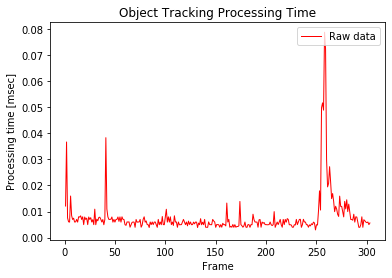

In [110]:
x = np.linspace(1,len(timeElapsedlist),len(timeElapsedlist))
y = timeElapsedlist
plt.figure(1)
plt.plot(x,y,color='r',linewidth=1.0,label='Raw data') #plotting
plt.title('Object Tracking Processing Time') #assigning plot title
plt.xlabel('Frame') #assigning x label
plt.ylabel('Processing time [msec]') #assigning y label
plt.legend(loc="upper right")#assigning legend and position of the legend
plt.show() #showing the plot

# Graph 2

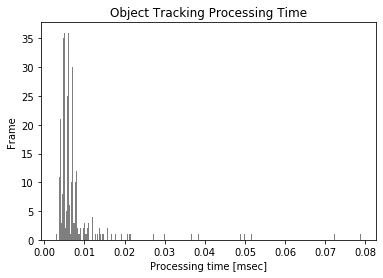

In [111]:
plt.figure(2)
plt.title('Object Tracking Processing Time') #assigning plot title
plt.xlabel('Processing time [msec]') #assigning x label
plt.ylabel('Frame') #assigning y label
x = timeElapsedlist
num_bins = len(timeElapsedlist)
n, bins, patches = plt.hist(x, num_bins, facecolor='k', alpha=0.5)
plt.show()